### IDs:
Insert yours IDs to the cell below

ID #1: 207380528

ID #2: 302673355


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import sys

sns.set_style("dark")
%matplotlib inline


### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

#### Answer
Define a random variable that counts the probability of getting a defective product: $X$~$Binom(0.03,n)$.
We'll calculate $1-P(k=0)=0.85$

$1-P(k=0)=1-$ ${n}\choose{0}$ $\cdot 0.03^0 \cdot 0.97^n = 0.85$

$-0.97^n=-0.15$

$log_{0.97}{0.15}=n$

In [ ]:
def solve_for_n(binom_p, desired_p):
    return math.ceil(math.log(1-desired_p, 1-binom_p)) # ceil because we can't ask for a <float> number.

print(f'We would need {solve_for_n(0.03, 0.85)} products')

We would need 63 products


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

#### Answer

In [ ]:
print(f'We would need {solve_for_n(0.04, 0.95)} products')

We would need 74 products


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

#### Answer

We'll set a new random variable, Y, as a negative binomial. 

$Y \sim NegBinom(p,r)$ where $p$ is the probability to get a defective product and $r$ is the number of successes - number of defective products. And then we'll try differnet values of x until we find the $P(X \leq x) \geq 0.9$

In [ ]:
from scipy.stats import nbinom


p = 0.1 # p in a NB distibution
n_defective = 5 # Kth success in a NB distibution

confidence_p = 0.9 # target probability

# the n_defective/ (p **2) is just some intuitive proxy. 
# I will stop once it reaches the right probabilty.
x_range = np.arange(n_defective, n_defective/ p / 0.5) 

cdf = [nbinom.cdf(x, n_defective, p, loc=0) for x in x_range]


Let's plot the CDF values with their corresponding x values:

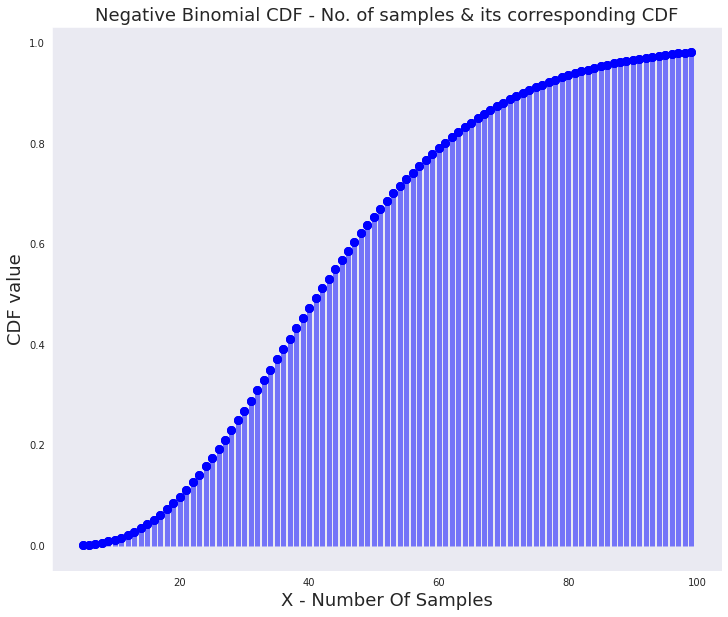

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.plot(x_range, cdf, 'bo', ms=8, label='NB CDF')
ax.plot(x_range, cdf, 'bo', ms=8, label='NB CDF')

plt.ylabel("CDF value", fontsize="18")
plt.xlabel("X - number of samples".title(), fontsize="18")

plt.title("Negative Binomial CDF - No. of samples & its corresponding CDF", fontsize="18")

ax.vlines(x_range, 0, cdf, colors='b', lw=5, alpha=0.5)

And now, let's get a real value so we can say how many sample we need exactly:

In [ ]:
higher_then_threshold = [cdf_val for cdf_val in cdf if cdf_val > confidence_p]
highest_and_closest_to_p_index = cdf.index(min(higher_then_threshold))

needed_samples = x_range[highest_and_closest_to_p_index]

print(f"Needed samples: {needed_samples}")


Needed samples: 73.0


Let's make sure it's really the minimum probabilty that is higher than 0.9.

In [ ]:
compare = [nbinom.cdf(x, n_defective, p, loc=0) for x in (needed_samples-1, needed_samples, needed_samples+1)]
print(f"P for needed_samples-1: {compare[0]:.4f}, P for needed_samples: {compare[1]:.4f}, P for needed_samples+1: {compare[2]:.4f}")

P for needed_samples-1: 0.8944, P for needed_samples: 0.9006, P for needed_samples+1: 0.9065


### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

#### Answer

First, we'll map out the requirements and the testing function, to ensure we can test our solutions easily:

In [ ]:
SH = {'pop': 16000, 'rent_mean': 6300, 'rent_median': 4600}
RG = {'pop': 22000, 'rent_mean': 4200, 'rent_median': 4600}

epsilon = sys.float_info.epsilon

def calc_iqr(array):
  q75, q25 = np.percentile(array, [75, 25])
  return q75 - q25



def verify_stats(sh_rent_array, rg_rent_array, sh_phi_array=None, rg_phi_array=None, phi_flag=False):
    print('Verfying pop size stat...')
    if len(sh_rent_array) - SH['pop'] > epsilon:
      print(f'The generated data for SH has a diff of {len(sh_rent_array) - SH["pop"]} observations')
    elif len(rg_rent_array) - RG['pop'] > epsilon:
      print(f'The generated data for RG has a diff of {len(rg_rent_array) - RG["pop"]} observations')
    else:
      print('Seems fine.')
      
    print('Verfying rent mean stat...')
    if np.mean(sh_rent_array) - SH['rent_mean'] > epsilon:
      print(f'The generated data for SH has a diff of {np.mean(sh_rent_array) - SH["rent_mean"]:.3f} in mean rent')
    elif np.mean(rg_rent_array) - RG['rent_mean'] > epsilon:
      print(f'The generated data for RG has a diff of {np.mean(rg_rent_array) - RG["rent_mean"]:.3f} in mean rent')
    else:
      print('Seems fine.')

    print("Verfying rent median stat...")
    if np.median(sh_rent_array) - SH['rent_median'] > epsilon:
      print(f'The generated data for SH has a diff of {np.median(sh_rent_array) - SH["rent_median"]:.3f} in median rent')
    if np.mean(rg_rent_array) - RG['rent_mean'] > epsilon:
      print(f'The generated data for RG has a diff of {np.median(rg_rent_array) - RG["rent_median"]:.3f} in median rent')
    else:
      print('Seems fine.')


    print("Verfying rent IQR stat...")
    if calc_iqr(sh_rent_array) >= calc_iqr(rg_rent_array):
      print(f'In the generated data SH does not have a lower IQR than RG. SH IQR is {calc_iqr(sh_rent_array):.0f} while RG IQR is {calc_iqr(rg_rent_array):.0f}.')
    else:
        print('Seems fine.')
    
    if phi_flag:
      print('Verfying PHI mean stat...')
      if np.mean(sh_phi_array) - SH['phi_mean'] > epsilon:
        print(f'The generated data for SH has a diff of {np.mean(sh_phi_array) - SH["phi_mean"]:.3f} in mean phi')
      elif np.mean(rg_phi_array) - RG['phi_mean'] > epsilon:
        print(f'The generated data for RG has a diff of {np.mean(rg_phi_array) - RG["phi_mean"]:.3f} in mean phi')
      else:
        print('Seems fine.')

      print("Verfying PHI median stat...")
      if np.median(sh_phi_array) - SH['phi_median'] > epsilon:
        print(f'The generated data for SH has a diff of {np.median(sh_phi_array) - SH["phi_median"]:.3f} in median phi')
      if np.mean(rg_phi_array) - RG['phi_mean'] > epsilon:
        print(f'The generated data for RG has a diff of {np.median(rg_phi_array) - RG["phi_median"]:.3f} in median phi')
      else:
        print('Seems fine.')
    
    print('Evaluation completed')
    return None

To create the distribtuions, for each city we'll generate two populations - poor population, who pays less rent, and a rich population, who pays a higher rent. These sub-populations will be mutually exclusive, and have will contain $n\div2 -1$ inhabitants. To these, we'll add 2 addition observations of the desired median. Each of the poor and rich populations will be then adjusted, to fit the desire mean. In addition, we'll correct the observations later on by adding or substracting a constant, to avoid negative results.   

In [ ]:
def find_dist(city, upper_ineq_factor, rich_sig, lower_ineq_facotr, poor_sig, var='rent'):
  poor_pop = np.random.normal(loc=city[var+'_mean']/lower_ineq_facotr, scale=poor_sig, size=math.floor(city['pop']/2)-1)
  rich_pop = np.random.normal(loc=city[var+'_mean']*upper_ineq_factor, scale=rich_sig, size=math.floor(city['pop']/2)-1)
  final_pop_sum = city[var+'_mean']* city['pop']
  extarnally_added_obs = 2
  sample_sum = np.sum([poor_pop, rich_pop]) + city[var+'_median'] * extarnally_added_obs 
  diff = (final_pop_sum - sample_sum) / (city['pop'] - extarnally_added_obs)
  pop_norm = np.concatenate([poor_pop + diff + 1000, rich_pop + diff - 1000, np.array([city[var+'_median']] * extarnally_added_obs)])
  return pop_norm

sh_rent_1 = find_dist(SH, upper_ineq_factor=1.1, rich_sig=100, lower_ineq_facotr=12, poor_sig=100)
rg_rent_1 = find_dist(RG, upper_ineq_factor=2.5, rich_sig=100, lower_ineq_facotr=1.2, poor_sig=100)
verify_stats(sh_rent_1, rg_rent_1)

Verfying pop size stat...
Seems fine.
Verfying rent mean stat...
Seems fine.
Verfying rent median stat...
Seems fine.
Verfying rent IQR stat...
Seems fine.
Evaluation completed


In the second variation, we'll use the same function, only with different parameters:

In [ ]:
sh_rent_2 = find_dist(SH, upper_ineq_factor=1.2, rich_sig=1000, lower_ineq_facotr=6, poor_sig=100)
rg_rent_2 = find_dist(RG, upper_ineq_factor=2.8, rich_sig=1000, lower_ineq_facotr=1 ,poor_sig=100)
verify_stats(sh_rent_array=sh_rent_2, rg_rent_array=rg_rent_2)

Verfying pop size stat...
Seems fine.
Verfying rent mean stat...
Seems fine.
Verfying rent median stat...
Seems fine.
Verfying rent IQR stat...
Seems fine.
Evaluation completed


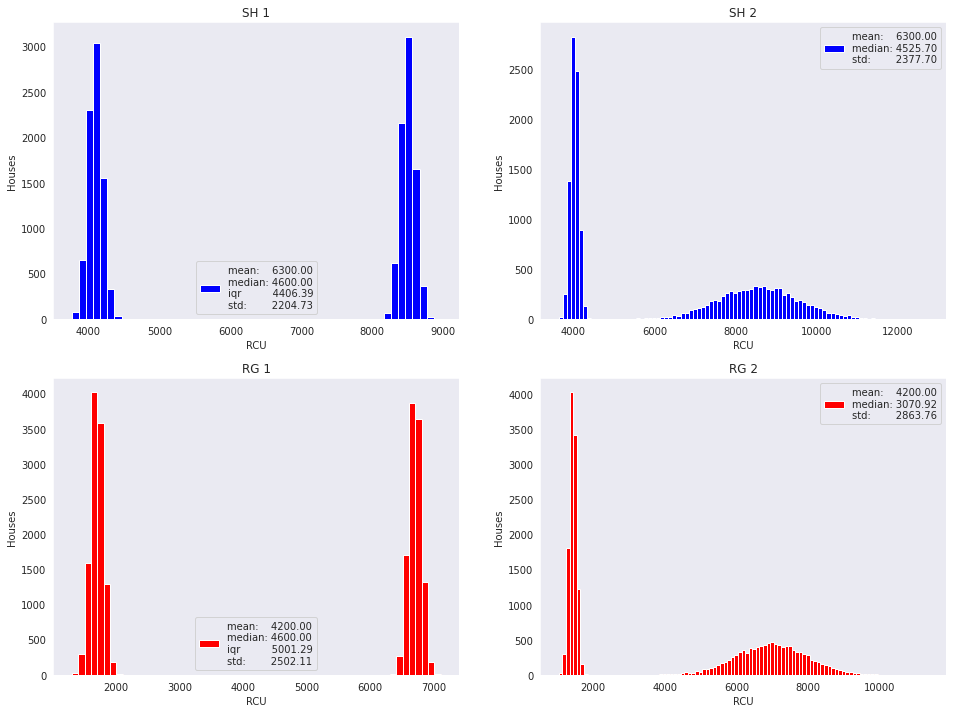

In [ ]:
legend_font_size = 10
bin_size = 100

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

q25, q75 = np.percentile(sh_rent_1, [25, 75])
iqr = q75 - q25
ax[0][0].hist(sh_rent_1, bins=np.arange(min(sh_rent_1), max(sh_rent_1) + bin_size, bin_size), color="blue")
ax[0][0].set_xlabel('RCU')
ax[0][0].set_ylabel('Houses')
ax[0][0].legend([f"mean: {np.mean(sh_rent_1):10.2f}\nmedian: {np.median(sh_rent_1):7.2f}\niqr {iqr:16.2f}\nstd: {(np.std(sh_rent_1)):14.2f}"], prop={'size': legend_font_size})
ax[0][0].title.set_text(f"SH 1")


q25, q75 = np.percentile(sh_rent_2, [25, 75])
iqr = q75 - q25
ax[0][1].hist(sh_rent_2, bins=np.arange(min(sh_rent_2), max(sh_rent_2) + bin_size, bin_size), color="blue")
ax[0][1].set_xlabel('RCU')
ax[0][1].set_ylabel('Houses')
ax[0][1].legend([f"mean: {np.mean(sh_rent_2):10.2f}\nmedian: {np.median(sh_rent_2):7.2f}\nstd:"
  f" {(np.std(sh_rent_2)):14.2f}"], prop={'size': legend_font_size})
ax[0][1].title.set_text(f"SH 2")


q25, q75 = np.percentile(rg_rent_1, [25, 75])
iqr = q75 - q25
ax[1][0].hist(rg_rent_1, bins=np.arange(min(rg_rent_1), max(rg_rent_1) + bin_size, bin_size), color='red')
ax[1][0].set_xlabel('RCU')
ax[1][0].set_ylabel('Houses')
ax[1][0].legend([f"mean: {np.mean(rg_rent_1):10.2f}\nmedian: {np.median(rg_rent_1):7.2f}\niqr {iqr:16.2f}\nstd: {(np.std(rg_rent_1)):14.2f}"], prop={'size': legend_font_size})
ax[1][0].title.set_text(f"RG 1")


q25, q75 = np.percentile(rg_rent_2, [25, 75])
iqr = q75 - q25
ax[1][1].hist(rg_rent_2, bins=np.arange(min(rg_rent_2), max(rg_rent_2) + bin_size, bin_size), color='red')
ax[1][1].set_xlabel('RCU')
ax[1][1].set_ylabel('Houses')
ax[1][1].legend([f"mean: {np.mean(rg_rent_2):10.2f}\nmedian: {np.median(rg_rent_2):7.2f}\nstd:"
  f" {(np.std(rg_rent_2)):14.2f}"], prop={'size': legend_font_size})
ax[1][1].title.set_text(f"RG 2")

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

#### Answer

In this part we'll divide the populations to 4. We'll manipulate the median in the same fashion, but here we'll have a more direct way to control the IQR of the two cities AND their overall variance. A larger inequality factor for both the rich and the poor population (more "dramatic" mu of their distribution) will result in larger variance, and a smaller inequality factor to the medium populations will result in lower IQR. We'll test the variance requirement and the standard requirements as well: 

In [ ]:
def generate_pop_by_qs(city, extr_rich_ineq_fact,  extr_rich_sig, extr_poor_ineq_fact, extr_poor_sig):
  very_poor_pop = np.random.normal(loc=city['rent_mean']/extr_poor_ineq_fact, scale=extr_poor_sig, size=math.floor(city['pop']/4)-1).round().astype(np.int)
  poor_pop = np.random.normal(loc=city['rent_mean']/extr_poor_ineq_fact/2, scale=extr_poor_sig, size=math.floor(city['pop']/4)-1).round().astype(np.int)
  rich_pop = np.random.normal(loc=city['rent_mean']*extr_rich_ineq_fact/2, scale=extr_rich_sig, size=math.floor(city['pop']/4)-1).round().astype(np.int)
  very_rich_pop = np.random.normal(loc=city['rent_mean']*extr_rich_ineq_fact, scale=extr_rich_sig, size=math.floor(city['pop']/4)-1).round().astype(np.int)
  final_pop_sum = city['rent_mean']* city['pop']
  extarnally_added_obs = 4
  sample_sum = np.sum([very_poor_pop, poor_pop, rich_pop, very_rich_pop]) + city['rent_median'] * extarnally_added_obs 
  diff = (final_pop_sum - sample_sum) / (city['pop'] - extarnally_added_obs)
  pop_norm = np.concatenate([very_poor_pop + diff + 1000, poor_pop + diff + 2000, rich_pop + diff, very_rich_pop + diff - 3000, np.array([city['rent_median']] * extarnally_added_obs)])
  return pop_norm

sh_rent_3 = generate_pop_by_qs(SH, extr_rich_ineq_fact=2.5,  extr_rich_sig=200, extr_poor_ineq_fact=1.4, extr_poor_sig=100)
rg_rent_3 = generate_pop_by_qs(RG, extr_rich_ineq_fact=3.1,  extr_rich_sig=100, extr_poor_ineq_fact=2.5, extr_poor_sig=40)
print('Verfiying variance...')
if np.var(sh_rent_3) <= np.var(rg_rent_3):
  print('SH variance is not larger than RG variance')
else:
  print('Seems fine.')
verify_stats(sh_rent_array=sh_rent_3, rg_rent_array=rg_rent_3)

Verfiying variance...
Seems fine.
Verfying pop size stat...
Seems fine.
Verfying rent mean stat...
Seems fine.
Verfying rent median stat...
Seems fine.
Verfying rent IQR stat...
Seems fine.
Evaluation completed


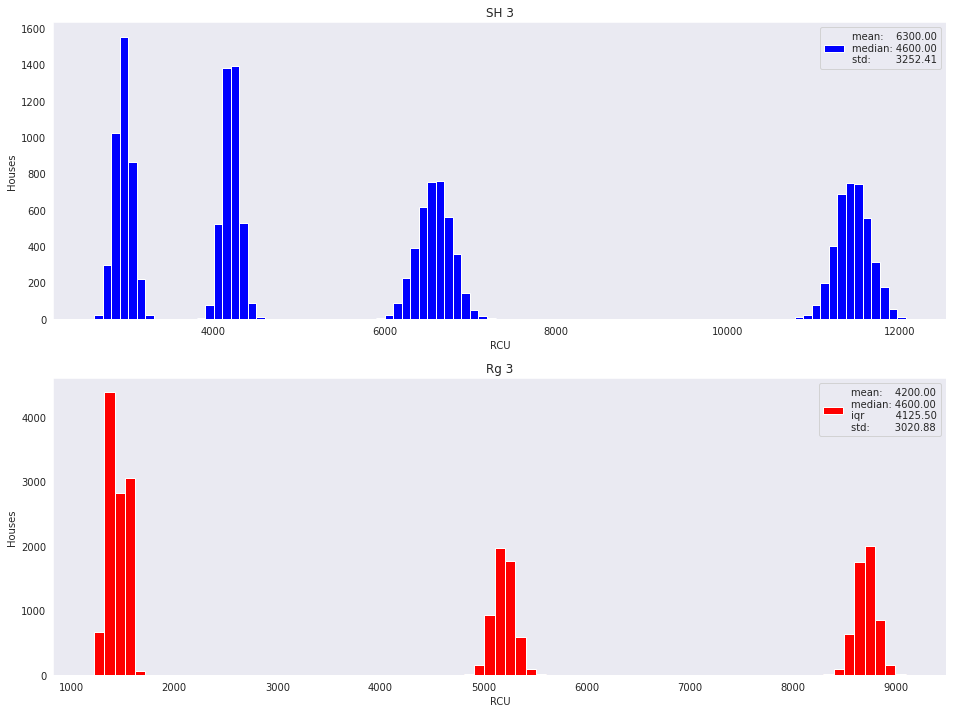

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

q25, q75 = np.percentile(sh_rent_3, [25, 75])
iqr = q75 - q25
ax[0].hist(sh_rent_3, bins=math.ceil((np.max(sh_rent_3) - np.min(sh_rent_3)) / bin_size), color="blue")
ax[0].set_xlabel('RCU')
ax[0].set_ylabel('Houses')
ax[0].legend([f"mean: {np.mean(sh_rent_3):10.2f}\nmedian: {np.median(sh_rent_3):7.2f}\nstd:"
  f" {(np.std(sh_rent_3)):14.2f}"], prop={'size': legend_font_size})
ax[0].title.set_text(f"SH 3")


q25, q75 = np.percentile(rg_rent_3, [25, 75])
iqr = q75 - q25
ax[1].hist(rg_rent_3, bins=math.ceil((np.max(rg_rent_3) - np.min(rg_rent_3)) / bin_size), color='red')
ax[1].set_xlabel('RCU')
ax[1].set_ylabel('Houses')
ax[1].legend([f"mean: {np.mean(rg_rent_3):10.2f}\nmedian: {np.median(rg_rent_3):7.2f}\niqr {iqr:16.2f}\nstd: {(np.std(rg_rent_3)):14.2f}"], prop={'size': legend_font_size})
ax[1].title.set_text(f"RG 3".title())


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

#### Answer

In [ ]:
SH.update({'phi_mean': 12500, 'phi_median': 12000, 'a':0.97})
RG.update({'phi_mean': 8500, 'phi_median': 8000, 'a':0.89})

We'll use the same function as before to generate PHI distributions with a poor and a rich population, and test the covariance requirement in addition to the base requirements:

In [ ]:
sh_rent_4 = find_dist(SH, upper_ineq_factor=1.2, rich_sig=500, lower_ineq_facotr=6, poor_sig=100)
rg_rent_4 = find_dist(RG, upper_ineq_factor=2.8, rich_sig=100, lower_ineq_facotr=1 ,poor_sig=100)
sh_phi = find_dist(SH, upper_ineq_factor=2.1, rich_sig=2000, lower_ineq_facotr=1.65, poor_sig=70 ,var='phi')
rg_phi = find_dist(RG, upper_ineq_factor=1.1, rich_sig=700, lower_ineq_facotr=2.15, poor_sig=1000 ,var='phi')

print('Verfiying Pearson coef...')
if np.cov(sh_rent_4, sh_phi)[0,1]/ (np.std(sh_rent_4) * np.std(sh_phi)) > SH['a'] + 0.01 or np.cov(sh_rent_4, sh_phi)[0,1]/ (np.std(sh_rent_4) * np.std(sh_phi)) < SH['a'] - 0.01:
  print('Perason coef seems wrong for SH')
if np.cov(rg_rent_4, rg_phi)[0,1]/ (np.std(rg_phi) * np.std(rg_rent_4)) > RG['a'] + 0.01 or np.cov(rg_rent_4, rg_phi)[0,1]/ (np.std(rg_phi) * np.std(rg_rent_4)) < RG['a'] - 0.01:
  print('Perason coef seems wrong for RG')
else:
  print('Seems fine.')
verify_stats(sh_rent_4, rg_rent_4, sh_phi, rg_phi, phi_flag=True)

Verfiying Pearson coef...
Seems fine.
Verfying pop size stat...
Seems fine.
Verfying rent mean stat...
Seems fine.
Verfying rent median stat...
Seems fine.
Verfying rent IQR stat...
Seems fine.
Verfying PHI mean stat...
Seems fine.
Verfying PHI median stat...
Seems fine.
Evaluation completed


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

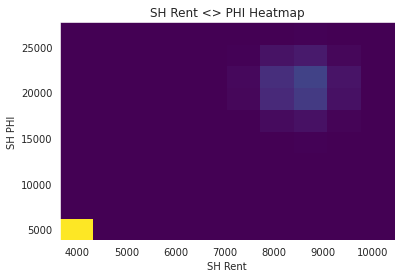

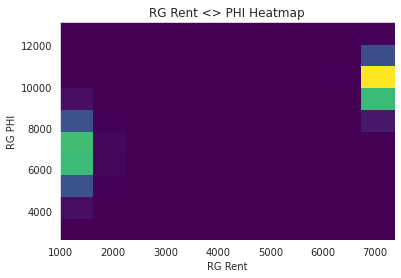

In [ ]:
plt.hist2d(x=sh_rent_4,y=sh_phi ,cmap='viridis',bins=10)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.title('SH Rent <> PHI Heatmap')
plt.show()

plt.hist2d(x=rg_rent_4,y=rg_phi ,cmap='viridis',bins=10)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.title('RG Rent <> PHI Heatmap')
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

#### Answer

In [ ]:
from scipy.stats import multinomial

k = 100
n = 20
p = [0.2,0.1,0.1,0.1,0.2,0.3]

X = multinomial(n, p)
sample = X.rvs(size=k)
y_cols = sample[:, 1:4]
y = y_cols.sum(axis=1)
y_mean = y.mean()
moment = ((y - y_mean)**3).sum() / k 
print(f'The empirical centralized third moment of  𝑌  based on {k}  experiments is {moment:.3f}')

The empirical centralized third moment of  𝑌  based on 100  experiments is -0.120


In class, we've calculated the 3rd moment of a Binomial RV, by viewing it as a summation of n Bernouli experiments. Each of the Bernouli experiments' expected value is p, and so we calculated the moment mathematically. 

Here, we've used Multinomial distribution, which is constructed by several Binomial random variables. We've generated the data ourselves, and instead of relying on the theoretical expected value of the each Binomial distribution, we've calculated it ourselves, using our observation's statistics.

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

#### Answer

Let $A = X+Y+Z$, a convolution of three RVs $X, Y, Z$:

$var(A) = cov(A,A)$ by definition. Plug in the $X,Y,Z$ RVs:

$var(A) = cov(X+Y+Z,X+Y+z)$ 

$var(A) = cov(X,X) + cov(Y,Y) + cov(Z,Z) + 2cov(X,Y) + 2cov(X,Z) + 2cov(Y,Z)$ As $cov(α,α) = var(α)$ we get

$var(A) = var(X) + var(Y) + var(Z) + 2cov(X,Y) + 2cov(X,Z) + 2cov(Y,Z)$

If $X, Y, Z$ are pairwise independent, it means that the result of each of $cov(α,β) = 0$ for any pair of the three. Hence, $cov(X,Y) = cov(X,Z) = cov(Y,Z) = 0$, and then $var(X+Y+Z) = var(X) + var(Y) + var(Z)$

If X,Y,Z are pairwise independent it does NOT mean that that they are collectively independent, as collective independence demands that $P(X \cap Y \cap Z) = 0$ as well.


If $X\sim Binom(n, p)$, $Y\sim Binom(n, 1-p)$ and $Z$ is define by sucesses of both $X$ and $Y$, then all are pairwise independent but not can't be collectively idependent. 

For example, if player A makes a free throw (RV $X$), player B makes a free throw (RV $Y$) and $Z$ denotes if both players make their free throws OR both players miss their free throws. 

Player A's success is independent of player B's success and vice versa. Also, $Z$'s result does not give us any additional informatin regarding $X$ or $Y$; If $Z=1$, with regards to player A, it will not change their probablity of hitting or missing the shot.

However, the outcome of both of player A and B's shots decide $Z$. Hence, the three are pairwise independent and NOT collectively independent.

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

#### Answer

We'll set our input $P$ to be a dictionary of $probs$ and matching $values$.

As we cannot be sure that our input will have be a series of following values (1,2,3,4.. as opposed to 1,2,45,65), and as $Q$ is supposed to report sum of all values, we'll create a helper function to get all possible output values.

To generate the matching probabilities for each of the newly generated values, we'll use $fftconvolve$.

In [ ]:
def get_possible_values(values1, values2):
  """
  Helper function, the unique sum of all the combinations unique values
  """
  return np.unique(np.array(np.meshgrid(values1, values2)).T.reshape(-1, 2).sum(axis=1))

In [ ]:
from scipy.signal import fftconvolve

def NFoldConv(P , n):
  """
  P is:
  {
  "probs": [...]
  "values": [...]
  }
  """
  if n == 0:
    return None
  
  if n == 1:
    return P

  values = P["values"] # 
  conv_pdf = fftconvolve(P["probs"], P["probs"], 'full')

  new_values = get_possible_values(values, values)
  if n == 2:
    Q = {"probs": conv_pdf,
         "values": new_values}
    return Q

  for i in range(n-2):
    new_values = get_possible_values(new_values, values)
    conv_pdf = fftconvolve(conv_pdf, P["probs"], 'full')
  
  Q = {"probs": conv_pdf,
         "values": new_values}
  
  return Q


#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


#### Answer

In [ ]:
P = {"probs": [1/8] * 8,
     "values": list(range(1, 9))}

n = 17
Q = NFoldConv(P, n)

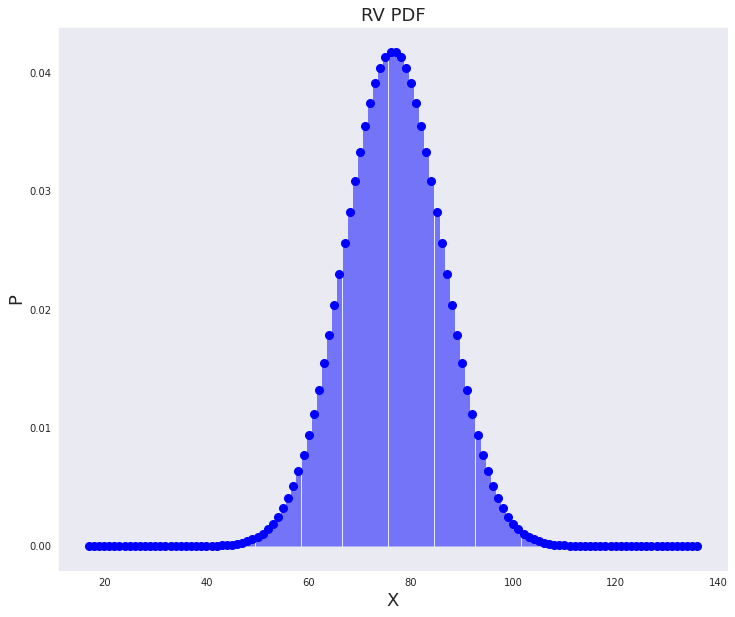

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.plot(Q["values"], Q["probs"], 'bo', ms=8, label='RV PDF')

plt.ylabel("P", fontsize="18")
plt.xlabel("X".title(), fontsize="18")

plt.title("RV PDF", fontsize="18")

ax.vlines(Q["values"], 0, Q["probs"], colors='b', lw=5, alpha=0.5)